# Classification des Iris

Dans cet exemple, nous allons développer quelques modèles d'apprentissage automatique afin de classifier différentes espèces d'Iris, en particulier l'iris Setosa (iris de l'Alaska), Versicolor (ou clajeux) et Virginica (de Virginie).

Nous allons résoudre ce problème pas-à-pas afin de bien comprendre les différentes étapes mises en oeuvre dans l'apprentissage automatique, ainsi que certaines notions mathématiques associées.

La [base données des Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) fait partie du module Python [Sci-kit learn](https://scikit-learn.org/stable/).

![Iris Versicolor](images/iris_versicolor.png "Iris Versicolor")

La base de données contient 50 échantillons de chacune des espèces d'iris mentionnées précédemment. Quatre caractéristiques ont été mesurées sur chaque échantillon : la longueur et la largeur des pétales et des sépales (en centimètres). Ces caractéristiques peuvent être utilisées pour classifier ou prédire l'espèce de l'iris. 


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

## Chargement des données

In [2]:
iris = datasets.load_iris()

In [ ]:
print(iris.DESCR)

In [ ]:
iris.target_names

In [ ]:
len(iris.data)

In [ ]:
iris.data

In [ ]:
iris.target

## Affichage des longueurs et largeurs des sépales

Text(0.5, 1.0, 'Distribution des dimensions des Sépales')

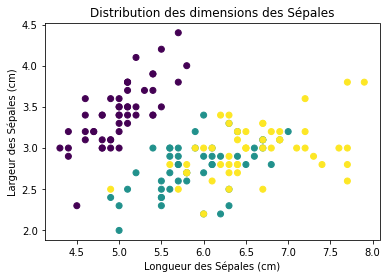

In [62]:
# Enregistrement dans la variable X des longueurs des sépales
# et dans la variable Y des largeurs des sépales
X = iris.data[:, 0]
Y = iris.data[:, 1]

# Les masques contenus dans le tableau iris.target vont être utlisés pour donner une couleur à chaque espèce d'iris
Masque_Couleur = iris.target

plt.scatter(X, Y, c=Masque_Couleur)
plt.xlabel('Longueur des Sépales (cm)')
plt.ylabel('Largeur des Sépales (cm)')
plt.title('Distribution des dimensions des Sépales')

## Affichage des longueurs et largeurs des pétales

In [ ]:
# Code à compléter

# Modèle de Regression Logistique (Regression Logistic model)


Nous allons créer un modèle qui va prédire si un échantillon appartient à une des catégories des espèces d'iris ou non.

La structure de ce modèle est la suivante :

![Regression logistique](images/perceptron75.png "Perceptron")

# Function Sigmoïde (Sigmoide function)

La [fonction Sigmoïde](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques)) est utilisée en regression logistique et dans les neurones artificiels. C'est une manière de transformer des valeurs continues en valeurs binaires. Cette fonction est également appellée "Fonction d'activation" dans les réseaux de neurones. De nombreux types de fonctions d'activations sont utilisés aujourd'hui.

In [ ]:
def sigmoid(z):
  return 1.0/(1 + math.exp(-z))

x = [i * 0.1 for i in range(-50, 50)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fonction Sigmoïde')

# Fonction de prédiction (Prediction Function)

Cette fonction prend un échantillon et multiplie les caractéristiques par les poids, ajoute l'offset et passe la valeur obtenue dans la fonction Sigmoïde.

Cette fonction sera utilisée pour déterminer les poids et l'offset à utliser pendant la phase d'apprentissage, ainsi que pour faire les prédictions une fois l'entrainement du modèle terminé.


In [ ]:
def predict(echantillon):
  result  = 0.0
  for i in range(len(echantillon)):
    result = result + poids[i] * echantillon[i]
    
  result = result + offset
  return sigmoid(result)

# Fonctions de Perte et de Coût (Loss and Cost Functions)

La fonction de perte (Loss function en Anglais) compare la valeur prédite à partir d'un échantillon (la valeur prédite est calculée par la fonction de prédiction) avec la valeur attendue (la valeur qu'on devrait trouver si la fonction de prédiction fonctionnait correctement - ce qui n'est pas le cas au débit de l'apprentissage !).

Si la valeur absolue de la différence entre ce qui est prédit et ce qui est attendu est grande, la fonction de perte doit retourner une grande valeur. Inversement, si la valeur absolue de la différence entre ce qui est prédit et ce qui est attendu est faible, la fonction de perte doit retourner une faible valeur.

Pour synthétiser : Plus la fonction de prédiction est mauvaise, plus les pertes sont élevées :

<img src="https://github.com/AlexandreBourrieau/ML/blob/main/Regression/images/chaudFroid.png?raw=true" width="500"/>

La fonction de perte n'est pas juste la valeur absolue de la différence mais est plus élaborée, afin de rendre les calculs plus rapides et l'entrainement du modèle plus simple.

$$\mathcal L(y, \hat y) = -(y \ln \hat y + (1-y) \ln (1 - \hat y))$$

$\;\;\;\;\;\;\;$ $\mathcal L$ : Pertes  
$\;\;\;\;\;\;\;$ $y$ : Valeur attendue en sortie du modèle  
$\;\;\;\;\;\;\;$ $\hat y$ : Valeur prédite obtenue par le modèle.

In [ ]:
def pertes(y_attendu, y_predit):
  return -(y_attendu * math.log(y_predit) + (1.0 - y_attendu) * math.log(1 - y_predit))

Nous pouvons regarder à quoi ressemble cette fonction pour une valeur attendue fixe (ici 0.9) en fonction des valeurs prédites (ici allant de 0.1 à 1).

On observe bien que les pertes diminuent lorsque la valeur prédite se rapproche la valeur attendue :

In [ ]:
y_attendu = 0.9
x = [i * 0.1 for i in range(1, 10)]
y = [pertes(y_attendu, yp) for yp in x]
plt.plot(x, y)
plt.xlabel('Valeurs prédites')
plt.ylabel('Pertes')
plt.title('Pertes en fonction des valeurs prédites pour une valeur attendue de %0.2f' % y_attendu)

La fonction de coût est la valeur moyenne des pertes pour tous les échantillons testés. Ainsi, par exemple si on a testé 10 échantillons avec les résultats suivants alors le coût sera de 0.3 :

<img src="https://github.com/AlexandreBourrieau/ML/blob/main/Regression/images/Tableau.png?raw=true" width="500"/>

Mathématiquement, pour un nombre m d'échantillons testés, le coût (noté J) peut être exprimé de la manière suivante :

$$\mathcal J = \frac{1}{m} \sum_{i=1}^{m} \mathcal L(y, \hat y)$$

## Algorithme du Gradient (Gradient Descent Algorithm)

[L'algorithme du gradient](https://fr.wikipedia.org/wiki/Algorithme_du_gradient) a pour but d'ajuster les poids et l'offset du modèle afin de minimiser le coût, et donc d'obtenir le modèle le plus juste possible. L'algorithme du gradient calcule la dérivée (gradient), c'est-à-dire la pente, de la fonction de coût pour différentes valeurs de poids et d'offsets.

Les équations générales sont les suivantes : 

$$w_{k+1} = w_{k} - \alpha J'(w)$$
$$b_{k+1} = b_{k} - \alpha J'(b)$$

Avec :  
$\;\;\;\;\;\;\;$ $w_{k}$ et $b_{k}$ les valeurs courantes des poids et de l'offset  
$\;\;\;\;\;\;\;$ $w_{k+}$ et $b_{k+1}$ les valeurs de la prochaine itération.  
$\;\;\;\;\;\;\;$ $J'(w)$ la dérivée de la fonction de coût par rapport aux poids  
$\;\;\;\;\;\;\;$ $J'(b)$ la dérivée de la fonction de coût par rapport à l'offset


Le nombre $\alpha$ est le taux d'apprentissage qui permet de paramétrer la manière dont va s'exécuter l'algorithme. Si le taux d'apprentissage est trop petit, le modèle va mettre beaucoup de temps à s'entrainer. Si ce taux est trop grand, le modèle risque de ne jamais trouver de solution.

Considérons un exemple simple :

$$J(w) = w^2 + \frac{w}{2}$$

In [ ]:
def cout(w):
    return w**2 + w/2.0

w = [i * 0.1 for i in range(-10, 11)]
J = [cout(wi) for wi in w]
plt.plot(w, J)
plt.xlabel('poids w')
plt.ylabel('Coût J')
plt.title('Fonction Coût (J)')

La dérivée de cette fonction par rapport au poids $w$ est :

$$J'(w) = 2w + 0.5$$

Pour trouver le minimum avec l'algorithme du gradient, nous devons itérer cette équation :

$$w_{k+1} = w_{k} - \alpha J'(w)$$

In [ ]:
w_k = 0.0

taux_apprentissage = 0.8

def derive(w):
  return 2*w + 0.5

for i in range(15):
    gradient = derive(w_k)
    w_k = w_k - taux_apprentissage*gradient

print('Minimum %0.2f, %0.2f' % (w_k, cout(w_k)))
print('Derivée (gradient) %0.2f' % gradient)

w = [i * 0.1 for i in range(-10, 11)]
J = [cout(wi) for wi in w]
plt.plot(w, J)
plt.xlabel('poids w')
plt.ylabel('coût J')
plt.plot(w_k, cout(w_k), 'ro')
line_x = [w_k - 0.5, w_k + 0.5]
line_y = [gradient*(wi-w_k)+cout(w_k) for wi in line_x]
plt.plot(line_x, line_y)
plt.title('Fonction parabolique')

# Utilisation de Keras / Tensorflow

**1. Création du réseau de neurones**

Nous allons utiliser la librarie Python [Keras](https://keras.io/) pour mettre en oeuvre notre modèle de classification.

On commence par importer les librairies python :

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

On construit ensuite notre modèle à une couche :

![Regression logistique](images/perceptron75.png "Perceptron")

Notre modèle utilise une [couche dense](https://keras.io/api/layers/core_layers/dense/) avec une fonction d'activation de type Sigmoïde :

In [4]:
model = Sequential()
model.add(Dense(1,activation="sigmoid",input_shape=(4,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


**2. Création des données d'entrainement et de test**

A partir de l'ensemble des données disponibles dans les variables `iris.data` (données d'entrées X) et `iris.target` (données des labels Y), on construit deux ensembles :
- (X_train, y_train) : Ce sont les données dédiées à la phase d'entrainement. X_train sont les données d'entrées et y_train sont les labels en sortie.
- (X_test, y_test) : Ce sont les données dédiées à la phase de test. Elles ne sont pas utilisées pour réaliser l'entrainement du modèle, mais uniquement pour tester le modèle.

La méthode [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) permet de créer automatiquent ces deux ensembles, en spécifiant le poucentage de données que l'on souhaite utiliser pour l'entrainement et le test. Ici on choisit d'utiliser 20% des données pour les tests.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [47]:
X_train.shape

(120, 4)

In [48]:
X_test.shape

(30, 4)

Dans les données d'entrainement et de test qui contiennent les labels (y_train & y_test), on retrouve les valeurs permettant d'identifier les classes de chaque type d'Iris (les trois classes 0, 1 et 2) :

In [49]:
y_train

array([1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2,
       0, 1, 0, 2, 2, 0, 1, 0, 1, 2])

**3. Création des labels dédiés à l'identification d'une classe**

A partir des labels contenus dans les variables y_train & y_test, on va maintenant créer les labels permettant d'identifier uniquement la classe 0. Les variables suivantes vont donc permettre d'identifier si les données d'entrées X correspondent à une classe 0 ou non :

In [6]:
classe_a_identifier = 1

train_labels = np.asarray([1 if y == classe_a_identifier else 0 for y in y_train])
test_labels = np.asarray([1 if y == classe_a_identifier else 0 for y in y_test])

In [51]:
np.asarray(train_labels)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

**4. Compilation du modèle**

Avant de pouvoir entrainer notre modèle, nous devons le compiler en précisant les paramètres à utiliser pour :
- L'optimiseur à utiliser (ici on utilisera l'optmiseur Adam)
- Le taux d'apprentissage à utiliser (learning_rate)
- La fonction de perte à utiliser
- Et éventuellement la métrique à utiliser

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

**5. Entrainement du modèle**

In [8]:
historique = model.fit(X_train, train_labels, epochs=100, batch_size=1, verbose=1, validation_data=(X_test,test_labels))

Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 0.7391 - accuracy: 0.6917 - val_loss: 0.8850 - val_accuracy: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6917 - val_loss: 0.7696 - val_accuracy: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6917 - val_loss: 0.7141 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.6917 - val_loss: 0.6982 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.6917 - val_loss: 0.6846 - val_accuracy: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.6917 - val_loss: 0.6798 - val_accuracy: 0.6000
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.6917 - val_loss: 0.6795 - val_accuracy: 0.6000

Affiche quelques informations sur l'entrainement du modèle :

Pertes (Test) : 0.6258150339126587
Précision (Test) : 0.5666666626930237


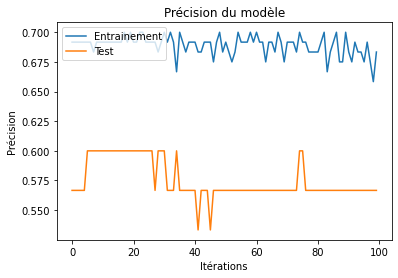

In [9]:
# Evalue la précision du modèle avec les données de tests
score = model.evaluate(X_test, test_labels, verbose=0)
print('Pertes (Test) :', score[0])
print('Précision (Test) :', score[1])

# Affiche les informations
plt.plot(historique.history['accuracy'])
plt.plot(historique.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Itérations')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

**6. Prédictions**

Pour réaliser des prédictions, on utliise la méthode `predict` de la classe `Model` :

In [57]:
model.predict(X_train)

array([[3.6025345e-03],
       [6.3076615e-04],
       [1.8814206e-04],
       [3.8476075e-05],
       [9.6243405e-01],
       [3.0392408e-04],
       [9.8990619e-01],
       [4.4698447e-02],
       [9.8602653e-01],
       [9.8850369e-01],
       [1.7836814e-05],
       [3.9926171e-04],
       [2.8217137e-03],
       [1.4324039e-02],
       [2.7266145e-04],
       [5.2910179e-02],
       [3.4767389e-04],
       [9.8545444e-01],
       [8.9540631e-02],
       [1.2412727e-02],
       [7.2025955e-03],
       [2.3105741e-04],
       [5.7649642e-05],
       [9.8074448e-01],
       [9.7033846e-01],
       [9.3668699e-04],
       [9.9100780e-01],
       [1.9642711e-04],
       [2.7871132e-04],
       [1.3809621e-02],
       [1.1216909e-02],
       [9.6394145e-01],
       [2.1174550e-04],
       [3.4407829e-05],
       [2.5169104e-02],
       [6.8907568e-05],
       [9.0935826e-04],
       [9.7648096e-01],
       [1.5339255e-04],
       [7.4004233e-03],
       [9.9546576e-01],
       [3.211200

In [10]:
predictions = []

echantillons_a_tester = X_test
valeurs_attendues_des_echantillons = test_labels

m = len(echantillons_a_tester)
correct = 0
for i in range(m):
  ech = echantillons_a_tester[i]
  valeur_predite = model.predict(tf.expand_dims(ech,0))
  if valeur_predite >= 0.5:
    valeur_predite = 1
  else:
    valeur_predite = 0
  predictions.append(valeur_predite)
  if valeur_predite == valeurs_attendues_des_echantillons[i]:
    correct = correct + 1.0

In [59]:
predictions

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0]

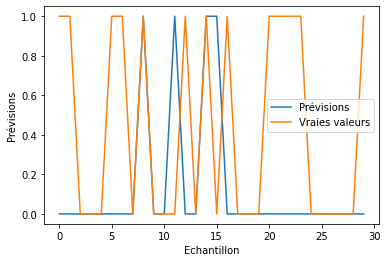

Précision: 56.67 %


In [11]:
plt.plot(range(m), predictions, label='Prévisions')
plt.plot(range(m), valeurs_attendues_des_echantillons, label='Vraies valeurs')
plt.ylabel('Prévisions')
plt.xlabel('Echantillon')
plt.legend(loc='best')
plt.show()

print('Précision: %.2f %%' % (100 * correct/m))

# Amélioration du réseau - Réseau de neurones profond

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

On construit ensuite notre modèle à plusieurs couches :

![Deep network](images/deep_network.jpg "deep_network")

In [13]:
model = Sequential()
model.add(Dense(4,input_shape=(4,)))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(32))
model.add(Dense(8))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,693
Trainable params: 2,693
Non-trainable params: 0
_________________________________________________________________


In [14]:
classe_a_identifier = 1

train_labels = np.asarray([1 if y == classe_a_identifier else 0 for y in y_train])
test_labels = np.asarray([1 if y == classe_a_identifier else 0 for y in y_test])

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [16]:
historique = model.fit(X_train, train_labels, epochs=100, batch_size=1, verbose=1, validation_data=(X_test,test_labels))

Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 0.6273 - accuracy: 0.6917 - val_loss: 0.6589 - val_accuracy: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.6583 - val_loss: 0.7257 - val_accuracy: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6917 - val_loss: 0.7300 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.6417 - val_loss: 0.7017 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.6500 - val_loss: 0.6534 - val_accuracy: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.6833 - val_loss: 0.6093 - val_accuracy: 0.5333
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.6583 - val_loss: 0.7038 - val_accuracy: 0.5667

Pertes (Test) : 0.43694552779197693
Précision (Test) : 0.8999999761581421


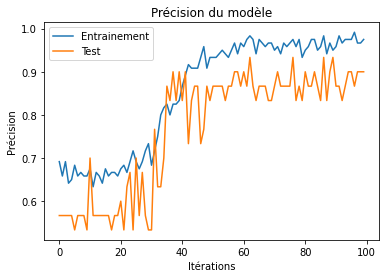

In [17]:
# Evalue la précision du modèle avec les données de tests
score = model.evaluate(X_test, test_labels, verbose=0)
print('Pertes (Test) :', score[0])
print('Précision (Test) :', score[1])

# Affiche les informations
plt.plot(historique.history['accuracy'])
plt.plot(historique.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Itérations')
plt.legend(['Entrainement', 'Test'], loc='upper left')
plt.show()

In [18]:
predictions = []

echantillons_a_tester = X_test
valeurs_attendues_des_echantillons = test_labels

m = len(echantillons_a_tester)
correct = 0
for i in range(m):
  ech = echantillons_a_tester[i]
  valeur_predite = model.predict(tf.expand_dims(ech,0))
  if valeur_predite >= 0.5:
    valeur_predite = 1
  else:
    valeur_predite = 0
  predictions.append(valeur_predite)
  if valeur_predite == valeurs_attendues_des_echantillons[i]:
    correct = correct + 1.0